# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import numpy as np
import pandas as pd
#Import dataframe flights
flights_test = pd.read_csv("flights_test.csv",low_memory=False).drop('Unnamed: 0',axis=1).drop(columns = ['mkt_unique_carrier', 'branded_code_share','op_unique_carrier','tail_num'])

In [3]:
flights_test

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,5888,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,6276,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,4598,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,4761,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,5162,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,4954,4954,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1859,2041,N,102,1,411
660552,2020-01-31,DL,4955,4955,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1515,1702,N,107,1,411
660553,2020-01-31,DL,4956,4956,12478,JFK,"New York, NY",10785,BTV,"Burlington, VT",2205,2337,N,92,1,266
660554,2020-01-31,DL,4957,4957,13930,ORD,"Chicago, IL",12478,JFK,"New York, NY",1035,1356,N,141,1,740


In [4]:
flights = pd.read_csv("flights.csv",low_memory=False).drop('Unnamed: 0',axis=1)[list(flights_test.columns)+['arr_delay','taxi_in','taxi_out']][:8000000]
# flights=flights.dropna()

In [7]:
flights

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,taxi_in,taxi_out
0,2018-10-08,WN,502,502,14679,SAN,"San Diego, CA",11292,DEN,"Denver, CO",810,1125,N,135.0,1.0,853.0,4.0,4.0,23.0
1,2018-10-08,WN,1009,1009,14679,SAN,"San Diego, CA",11292,DEN,"Denver, CO",1535,1850,N,135.0,1.0,853.0,7.0,6.0,24.0
2,2018-10-08,WN,1977,1977,14679,SAN,"San Diego, CA",11292,DEN,"Denver, CO",1325,1640,N,135.0,1.0,853.0,-2.0,9.0,12.0
3,2018-10-08,WN,2132,2132,14679,SAN,"San Diego, CA",11292,DEN,"Denver, CO",1030,1345,N,135.0,1.0,853.0,3.0,6.0,10.0
4,2018-10-08,WN,185,185,14679,SAN,"San Diego, CA",11618,EWR,"Newark, NJ",850,1705,N,315.0,1.0,2425.0,0.0,5.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,2019-07-11,UA,3417,3417,10785,BTV,"Burlington, VT",11618,EWR,"Newark, NJ",1745,1915,N,90.0,1.0,266.0,NaN,NaN,NaN
7999996,2019-07-11,UA,3418,3418,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",1545,1746,N,121.0,1.0,488.0,NaN,NaN,NaN
7999997,2019-07-11,UA,3419,3419,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",850,1056,N,126.0,1.0,488.0,-16.0,7.0,35.0
7999998,2019-07-11,UA,3420,3420,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",1715,1919,N,124.0,1.0,488.0,NaN,NaN,NaN


## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [15]:
def get_city_name(df):
    df['dest_city_name']=flights.dest_city_name.str[:-4]
    df['origin_city_name']=flights.origin_city_name.str[:-4]
    return df

In [16]:
flights_test=get_city_name(flights_test)

In [17]:
flights=get_city_name(flights)

In [28]:
def get_dep_arr_hr(df):
    df['dep_hr']=(df.crs_dep_time//100)*100
    df['arr_hr']=(df.crs_arr_time//100)*100
    return df

In [30]:
flights_test=get_dep_arr_hr(flights_test)

In [31]:
flights=get_dep_arr_hr(flights)

In [32]:
def get_weather_data(df):
    df=df.merge(weather, left_on=['fl_date','origin_city_name','dep_hr'], right_on=['date','city','time'],suffixes=('_left', '_right'))
    df=df.merge(weather, left_on=['fl_date','dest_city_name','arr_hr'], right_on=['date','city','time'],suffixes=('_origin', '_dest'))
    return df

In [33]:
flights=get_weather_data(flights)

In [34]:
flights_test=get_weather_data(flights_test)

In [35]:
flights

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,...,WindGustKmph_dest,visibility_dest,visibilityMiles_dest,cloudcover_dest,pressure_dest,humidity_dest,precipMM_dest,totalSnow_cm_dest,sunrise_dest,sunset_dest
0,2018-10-08,WN,502,502.0,14679,SAN,San Diego,11292,DEN,Denver,...,13,4,2,82,1012,83,0.6,2.8,703,1831
1,2018-10-08,UA,1209,1209.0,14679,SAN,San Diego,11292,DEN,Denver,...,13,4,2,82,1012,83,0.6,2.8,703,1831
2,2018-10-08,WN,2492,2492.0,14747,SEA,Seattle,11292,DEN,Denver,...,13,4,2,82,1012,83,0.6,2.8,703,1831
3,2018-10-08,UA,263,263.0,14747,SEA,Seattle,11292,DEN,Denver,...,13,4,2,82,1012,83,0.6,2.8,703,1831
4,2018-10-08,DL,2739,2739.0,14747,SEA,Seattle,11292,DEN,Denver,...,13,4,2,82,1012,83,0.6,2.8,703,1831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289242,2019-07-11,HA,248,248.0,12173,HNL,Honolulu,12758,KOA,Kona,...,13,10,6,33,1015,74,0.0,0.0,552,1907
8289243,2019-07-11,HA,263,263.0,12173,HNL,Honolulu,12982,LIH,Lihue,...,23,10,6,8,1016,69,0.0,0.0,601,1925
8289244,2019-07-11,HA,466,466.0,14222,PPG,Pago Pago,12173,HNL,Honolulu,...,23,10,6,48,1017,83,0.0,0.0,557,1917
8289245,2019-07-11,HA,512,512.0,12173,HNL,Honolulu,12402,ITO,Hilo,...,14,10,6,22,1016,78,0.0,0.0,549,1903


In [36]:
def time_machine(df):
    df['months']=pd.to_datetime(df.fl_date).dt.strftime("%b")
    df['weekday']=pd.to_datetime(df.fl_date).dt.strftime("%A")
time_machine(flights)
time_machine(flights_test)

In [37]:
def traffic(df):
    origin_traffic=df.groupby(['fl_date','origin']).sum()[['flights']].reset_index().rename({'flights': 'origin_traffic'}, axis='columns')
    dest_traffic=df.groupby(['fl_date','dest']).sum()[['flights']].reset_index().rename({'flights': 'dest_traffic'}, axis='columns')
    df = pd.merge(df, origin_traffic, on=['fl_date','origin'])
    df=pd.merge(df, dest_traffic, on=['fl_date','dest'])
    return df

In [38]:
flights_test=traffic(flights_test)
flights=traffic(flights)

In [39]:
flights

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,...,pressure_dest,humidity_dest,precipMM_dest,totalSnow_cm_dest,sunrise_dest,sunset_dest,months,weekday,origin_traffic,dest_traffic
0,2018-10-08,WN,502,502.0,14679,SAN,San Diego,11292,DEN,Denver,...,1012,83,0.6,2.8,703,1831,Oct,Monday,219.0,424.0
1,2018-10-08,UA,1209,1209.0,14679,SAN,San Diego,11292,DEN,Denver,...,1012,83,0.6,2.8,703,1831,Oct,Monday,219.0,424.0
2,2018-10-08,WN,1009,1009.0,14679,SAN,San Diego,11292,DEN,Denver,...,1012,81,0.1,2.8,703,1831,Oct,Monday,219.0,424.0
3,2018-10-08,UA,1040,1040.0,14679,SAN,San Diego,11292,DEN,Denver,...,1012,81,0.1,2.8,703,1831,Oct,Monday,219.0,424.0
4,2018-10-08,WN,1977,1977.0,14679,SAN,San Diego,11292,DEN,Denver,...,1011,76,0.0,2.8,703,1831,Oct,Monday,219.0,424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289242,2019-07-11,UA,174,174.0,12016,GUM,Guam,14955,SPN,Saipan,...,1011,72,0.0,0.0,554,1824,Jul,Thursday,3.0,2.0
8289243,2019-07-11,UA,104,104.0,12016,GUM,Guam,14955,SPN,Saipan,...,1010,74,0.4,0.0,554,1824,Jul,Thursday,3.0,2.0
8289244,2019-07-13,AA,3329,3329.0,11298,DFW,Dallas/Fort Worth,10781,BTR,Baton Rouge,...,1006,93,34.4,0.0,611,2009,Jul,Saturday,1.0,1.0
8289245,2019-07-14,UA,4268,4268.0,10781,BTR,Baton Rouge,12266,IAH,Houston,...,1012,62,0.2,0.0,630,2024,Jul,Sunday,1.0,1.0


In [40]:
def time_to_mins(df):
    df['crs_dep_time(mins)']=((df.crs_dep_time//100)*60)+df.crs_dep_time-(df.crs_dep_time//100)*100
    df['crs_arr_time(mins)']=((df.crs_arr_time//100)*60)+df.crs_arr_time-(df.crs_arr_time//100)*100

In [41]:
time_to_mins(flights)

In [42]:
time_to_mins(flights_test)

In [43]:
def taxi_Med(df):
    origin_taxi=flights.groupby('origin').taxi_out.median().to_frame().reset_index().rename({'taxi_out': 'origin_taxi'},axis='columns')
    dest_taxi=flights.groupby('dest').taxi_in.median().to_frame().reset_index().rename({'taxi_in': 'dest_taxi'},axis='columns')
    df=pd.merge(df,origin_taxi , on='origin')  
    df=pd.merge(df, dest_taxi, on='dest')
    return df


In [44]:
flights_test=taxi_Med(flights_test)
flights=taxi_Med(flights)

In [45]:
def one_hot1(df):
    df = df.join(pd.get_dummies(df.mkt_carrier))
    return df

In [46]:
def one_hot2(df):
    df = df.join(pd.get_dummies(df.weekday))
    return df

In [47]:
def one_hot3(df):
    df = df.join(pd.get_dummies(df.months))
    return df

In [48]:
flights=one_hot1(flights)

In [49]:
flights=one_hot2(flights)

In [50]:
flights=one_hot3(flights)

In [51]:
flights_test=one_hot1(flights_test)

In [52]:
flights_test=one_hot2(flights_test)

In [53]:
flights_test=one_hot3(flights_test)

In [43]:
features=['mkt_carrier_fl_num','crs_dep_time(mins)','crs_arr_time(mins)','crs_elapsed_time','distance','origin_traffic','dest_traffic','origin_taxi','dest_taxi']+list(flights_test.mkt_carrier.unique())
features=features+['Jan']+list(flights.weekday.unique())

#'mkt_carrier_fl_num'

## Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [19]:
from sklearn.preprocessing import RobustScaler
X=flights
transformer = RobustScaler().fit(X)
scaled_df=transformer.transform(X)



In [20]:
import matplotlib.pyplot as plt


In [21]:
from sklearn.decomposition import PCA

# Find the first 75 principle components of the dataset
pca = PCA(n_components=20)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (1115188, 20)


Text(0, 0.5, '% Cumulative explained variance')

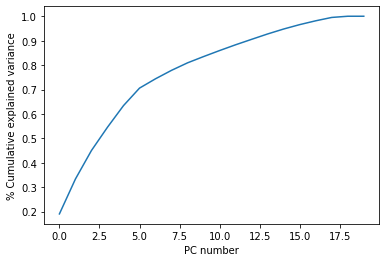

In [22]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [14]:
pca = PCA(n_components=31)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_fl = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_fl.shape))

Low-dimensional dataset shape: (1217645, 31)


### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale features since weight magnitudes will effect regularization weight penalties
# X_scaled = StandardScaler().fit_transform(flights)

# Hyperparameter settings we want to try
alphas = [ 0.01, 0.1, 1]
l1_ratios = [ 0.25, 0.5, 0.75,]

# Keep track of the best hyperparameters found so far
best_r2 = -np.inf
best_alpha = None
best_l1_ratio = None

for alpha in alphas:
    print('alpha')
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=27)
        cv_r2 = cross_val_score(model, flights, y, cv=4, scoring='r2')
        if cv_r2.mean() > best_r2:
            best_r2 = cv_r2.mean()
            best_alpha = alpha
            best_l1_ratio = l1_ratio
        print('l1_ratio')
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2}\nAlpha:\t{best_alpha}\nL1 ratio:\t{best_l1_ratio}')

alpha
l1_ratio
l1_ratio
l1_ratio
alpha
l1_ratio
l1_ratio
l1_ratio
alpha
l1_ratio
l1_ratio
l1_ratio
The best hyperparameter settings achieve a cross-validated R^2 of: 0.006053567040658098
Alpha:	0.01
L1 ratio:	0.25


In [84]:
regr=ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=27)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flights, y, test_size=0.2, random_state=123)

In [85]:
regr.fit(X_train,y_train)

preds = regr.predict(X_test)

C:\Users\cwh93\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1019247015.7574462, tolerance: 224638.73730968105
  positive)


In [86]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 49.109849


In [87]:
from sklearn.metrics import r2_score


In [88]:
r2_score(y_test, preds)

0.05124790506976362

In [89]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, preds)

0.0512507077152603

In [15]:
flights=flights.drop('index', axis=1)

In [3]:
import pandas as pd

In [136]:
flights=pd.read_csv('flights_30J.csv')

In [145]:
flights[flights.fl_date.str[-2:].astype('float64')<8].arr_delay.mean()

6.025094829226428

In [122]:
y=flights.arr_delay
flights=flights.drop('arr_delay',axis=1)

In [123]:
flights=flights.dropna()

In [124]:
flights=flights.drop('fl_date', axis=1)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flights, y, test_size=0.2, random_state=123)

In [126]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators =55 ,n_jobs=-1, random_state = 0)

In [127]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=55, n_jobs=-1, random_state=0)

In [103]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [88]:
y_pred_sub = regressor.predict(flights_ALL_test)

In [25]:
# Evaluating the Algorithm
import numpy as np
from sklearn import metrics
from sklearn.metrics import explained_variance_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Mean Absolute Error: 21.958372414763943
Mean Squared Error: 2106.465560699537
Root Mean Squared Error: 45.89624778453612
R2 Score: 0.1713523428871443
Explained Variance Score: 0.1735064494246673


In [14]:
# Evaluating the Algorithm
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 21.947728061551807
Mean Squared Error: 2103.1570843453887
Root Mean Squared Error: 45.86019062700665
R2_Score: 0.17265384110796878


In [108]:
flights_ALL_test=pd.read_csv('flights_30J_test.csv')

In [133]:
flights_ALL_test

,crs_dep_time(mins),crs_arr_time(mins),crs_elapsed_time,origin_traffic,dest_traffic,origin_taxi,dest_taxi,WN,DL,Monday,...,o_totalSnow_cm,o_sunrise,o_sunset,d_windspeedKmph,d_visibility,d_cloudcover,d_pressure,d_humidity,d_precipMM,d_totalSnow_cm
0,1090,1185,95,66,455,10.0,6.0,1,0,0,...,0.0,756.0,1752.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
1,960,1166,386,341,455,19.0,6.0,0,0,0,...,0.0,822.0,1746.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
2,1105,1170,125,517,455,14.0,6.0,1,0,0,...,0.0,733.0,1732.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
3,1100,1171,131,517,455,14.0,6.0,0,0,0,...,0.0,733.0,1732.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
4,1110,1195,85,70,455,12.0,6.0,0,0,0,...,0.0,820.0,1746.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793913,1049,1114,125,30,1,13.0,7.0,0,0,0,...,0.0,819.0,1851.0,15.0,10.0,81.0,1030.0,54.0,0.0,0.0
793914,1049,1114,125,30,1,13.0,7.0,0,0,1,...,0.0,818.0,1854.0,10.0,10.0,12.0,1034.0,51.0,0.0,0.0
793915,1049,1114,125,30,1,13.0,7.0,0,0,0,...,0.0,817.0,1857.0,19.0,10.0,100.0,1012.0,85.0,0.0,0.0
793916,1049,1114,125,30,1,13.0,7.0,0,0,1,...,0.0,816.0,1900.0,10.0,10.0,100.0,1017.0,78.0,0.0,0.0


In [110]:
flights_ALL_test=flights_ALL_test.dropna()

In [111]:
Submission=flights_ALL_test[['fl_date','mkt_carrier','mkt_carrier_fl_num','origin','dest']]

In [112]:
Submission

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest
0,2020-01-01,WN,5888,ONT,SFO
1,2020-01-01,AA,680,PHL,SFO
2,2020-01-01,WN,6116,PHX,SFO
3,2020-01-01,AA,686,PHX,SFO
4,2020-01-01,UA,5267,RNO,SFO
...,...,...,...,...,...
793913,2020-01-17,G4,2158,SFB,OWB
793914,2020-01-20,G4,2158,SFB,OWB
793915,2020-01-24,G4,2158,SFB,OWB
793916,2020-01-27,G4,2158,SFB,OWB


In [113]:
flights_ALL_test=flights_ALL_test.drop(['fl_date','mkt_carrier','mkt_carrier_fl_num','origin','dest'],axis=1)

In [114]:
flights_ALL_test

,crs_dep_time(mins),crs_arr_time(mins),crs_elapsed_time,origin_traffic,dest_traffic,origin_taxi,dest_taxi,WN,DL,Monday,...,o_totalSnow_cm,o_sunrise,o_sunset,d_windspeedKmph,d_visibility,d_cloudcover,d_pressure,d_humidity,d_precipMM,d_totalSnow_cm
0,1090,1185,95,66,455,10.0,6.0,1,0,0,...,0.0,756.0,1752.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
1,960,1166,386,341,455,19.0,6.0,0,0,0,...,0.0,822.0,1746.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
2,1105,1170,125,517,455,14.0,6.0,1,0,0,...,0.0,733.0,1732.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
3,1100,1171,131,517,455,14.0,6.0,0,0,0,...,0.0,733.0,1732.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
4,1110,1195,85,70,455,12.0,6.0,0,0,0,...,0.0,820.0,1746.0,16.0,10.0,49.0,1020.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793913,1049,1114,125,30,1,13.0,7.0,0,0,0,...,0.0,819.0,1851.0,15.0,10.0,81.0,1030.0,54.0,0.0,0.0
793914,1049,1114,125,30,1,13.0,7.0,0,0,1,...,0.0,818.0,1854.0,10.0,10.0,12.0,1034.0,51.0,0.0,0.0
793915,1049,1114,125,30,1,13.0,7.0,0,0,0,...,0.0,817.0,1857.0,19.0,10.0,100.0,1012.0,85.0,0.0,0.0
793916,1049,1114,125,30,1,13.0,7.0,0,0,1,...,0.0,816.0,1900.0,10.0,10.0,100.0,1017.0,78.0,0.0,0.0


In [134]:
y_pred_sub = regressor.predict(flights_ALL_test)

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

In [118]:
y_pred_sub.mean()

9.804707634300863

In [68]:
Submission['predicted_delay']=y_pred_sub

In [69]:
Submission.to_csv('submission.csv')

In [70]:
Submission[Submission.fl_date.str[-2:].astype(int)<8].to_csv('submission.csv')

In [132]:
pd.read_csv('submission.csv').drop('Unnamed: 0',axis=1)


,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,38.22
1,2020-01-01,AA,680,PHL,SFO,11.48
2,2020-01-01,WN,6116,PHX,SFO,26.26
3,2020-01-01,AA,686,PHX,SFO,32.92
4,2020-01-01,UA,5267,RNO,SFO,30.60
...,...,...,...,...,...,...
150473,2020-01-04,G4,2245,SFB,HGR,9.14
150474,2020-01-05,G4,2392,SFB,HGR,42.70
150475,2020-01-06,G4,2338,SFB,HGR,29.38
150476,2020-01-03,G4,2199,SFB,OWB,-6.00


======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.